In [ ]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, RandomFlip, RandomRotation, Resizing, Rescaling, BatchNormalization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/My Drive/uc_merced_land_use'

In [ ]:
BATCH_SIZE = 32
IMG_W = 256
IMG_H = 256
EPOCH = 6
CHANNEL = 3

INPUT_SHAPE = [BATCH_SIZE, IMG_W, IMG_H, CHANNEL]

In [ ]:
train_data = keras.utils.image_dataset_from_directory(data_path + '/images_train_test_val/train')
val_data = keras.utils.image_dataset_from_directory(data_path + '/images_train_test_val/validation')
test_data = keras.utils.image_dataset_from_directory(data_path + '/images_train_test_val/test')

Found 7360 files belonging to 21 classes.
Found 2107 files belonging to 21 classes.
Found 1050 files belonging to 21 classes.


In [ ]:
for batch_image, batch_label in train_data.take(1):
    print("Image batch shape:", batch_image.shape)
    print("Label batch shape:", batch_label.shape)
    break

print("Train data batches:", len(train_data))
print("Validation data batches:", len(val_data))
print("Test data batches:", len(test_data))

Image batch shape: (32, 256, 256, 3)
Label batch shape: (32,)
Train data batches: 230
Validation data batches: 66
Test data batches: 33


In [ ]:
classes = train_data.class_names
n_classes = len(classes)
classes
#n_classes

['agricultural',
 'airplane',
 'baseballdiamond',
 'beach',
 'buildings',
 'chaparral',
 'denseresidential',
 'forest',
 'freeway',
 'golfcourse',
 'harbor',
 'intersection',
 'mediumresidential',
 'mobilehomepark',
 'overpass',
 'parkinglot',
 'river',
 'runway',
 'sparseresidential',
 'storagetanks',
 'tenniscourt']

In [ ]:
for batch_image, batch_label in train_data.take(1):
    plt.figure(figsize=(16, 16))
    for i in range(16):
        img = batch_image[i].numpy().astype("uint8")
        lbl = classes[batch_label[i].numpy()]
        ax = plt.subplot(4, 4, i+1)
        plt.imshow(img)
        plt.title(lbl)
        plt.axis("off")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
augmentation = Sequential([
    Resizing(IMG_W, IMG_H),
    Rescaling(1.0/255),
    RandomFlip(mode="horizontal_and_vertical"),
    RandomRotation(0.1),
])

In [ ]:
model = keras.models.Sequential([
    augmentation,


    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=INPUT_SHAPE),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),


    Flatten(),


    Dense(64, activation='relu'),

    Dense(n_classes, activation='softmax')
])

model.build(input_shape=INPUT_SHAPE)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
optimizer= 'adam',
loss= keras.losses.SparseCategoricalCrossentropy(from_logits=False),
metrics= ['accuracy']
)

In [ ]:
history = model.fit(train_data, epochs=EPOCH, batch_size=BATCH_SIZE, verbose=1, validation_data=val_data)


Epoch 1/6
230/230 ━━━━━━━━━━━━━━━━━━━━ 1493s 6s/step - accuracy: 0.2333 - loss: 2.5421 - val_accuracy: 0.0925 - val_loss: 4.4884
Epoch 2/6
230/230 ━━━━━━━━━━━━━━━━━━━━ 1399s 6s/step - accuracy: 0.4890 - loss: 1.6004 - val_accuracy: 0.3588 - val_loss: 1.9992
Epoch 3/6
230/230 ━━━━━━━━━━━━━━━━━━━━ 1350s 6s/step - accuracy: 0.5762 - loss: 1.3217 - val_accuracy: 0.5923 - val_loss: 1.2442
Epoch 4/6
230/230 ━━━━━━━━━━━━━━━━━━━━ 1397s 6s/step - accuracy: 0.6452 - loss: 1.1069 - val_accuracy: 0.5695 - val_loss: 1.3428
Epoch 5/6
230/230 ━━━━━━━━━━━━━━━━━━━━ 1388s 6s/step - accuracy: 0.6711 - loss: 0.9759 - val_accuracy: 0.6588 - val_loss: 1.1091
Epoch 6/6
230/230 ━━━━━━━━━━━━━━━━━━━━ 1352s 6s/step - accuracy: 0.7031 - loss: 0.8847 - val_accuracy: 0.4689 - val_loss: 1.8104


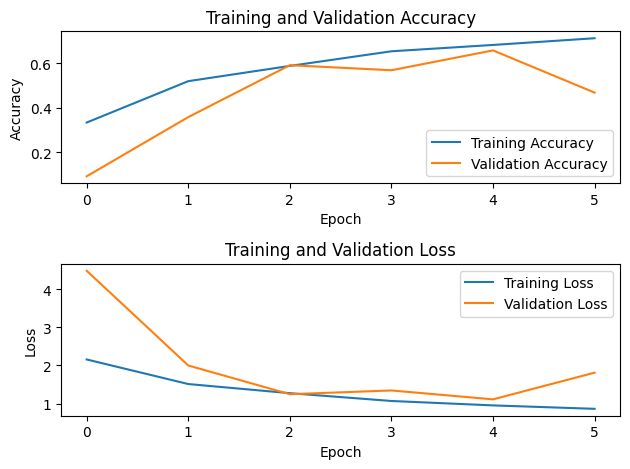

In [ ]:
# Plot training history for accuracy
plt.subplot(2, 1, 1)
plt.plot(history.history["accuracy"], label = "Training Accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Plot training history for loss
plt.subplot(2, 1, 2)
plt.plot(history.history["loss"], label = "Training Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# The original decode_labels function is not needed since labels are already class indices
# def decode_labels(labels):
#     return np.argmax(labels, axis = 1)

true_labels = []
all_pred_classes = []

for images, labels in test_data:
    predictions = model.predict(images)
    pred_classes = np.argmax(predictions, axis=1) # Decode predictions

    true_labels.extend(labels.numpy()) # Convert labels to numpy array if necessary
    all_pred_classes.extend(pred_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 

In [ ]:
report = classification_report(true_labels, all_pred_classes, target_names = classes)
print("Classification Report:")
print(report)

Classification Report:
                   precision    recall  f1-score   support

     agricultural       0.34      0.90      0.50        50
         airplane       0.92      0.24      0.38        50
  baseballdiamond       0.22      0.70      0.33        50
            beach       0.80      0.08      0.15        50
        buildings       0.53      0.34      0.41        50
        chaparral       0.94      0.92      0.93        50
 denseresidential       0.49      0.52      0.50        50
           forest       0.96      0.48      0.64        50
          freeway       0.30      0.34      0.32        50
       golfcourse       0.29      0.20      0.24        50
           harbor       0.98      0.92      0.95        50
     intersection       0.77      0.34      0.47        50
mediumresidential       0.41      0.14      0.21        50
   mobilehomepark       0.95      0.36      0.52        50
         overpass       0.42      0.44      0.43        50
       parkinglot       1.00    

In [ ]:
def decode_labels(labels):
     return np.argmax(labels, axis = 1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


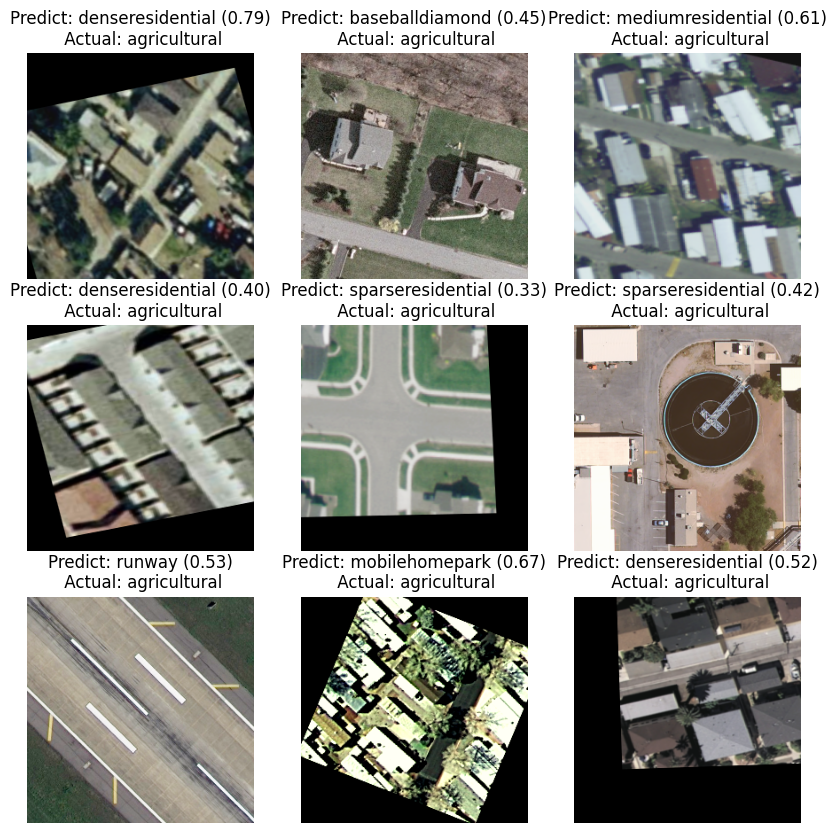

In [ ]:
for images, labels in test_data.take(1):
    predictions = model.predict(images)
    pred_classes = decode_labels(predictions)

    plt.figure(figsize = (10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        pred_class = classes[pred_classes[i]]
        true_class = classes[np.argmax(labels[i])]
        prob = np.max(predictions[i])
        plt.title(f"Predict: {pred_class} ({prob:.2f})\n Actual: {true_class}")
        plt.axis("off")
    plt.show()